In [2]:
import csv_import
import numpy as np
import pandas as pd
from ase import *
from ase import Atoms
import ase.visualize
from IPython import embed
from ase.collections import g2
from ase.gui.gui import GUI
from ase.visualize import view
import ase.io as io
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pylab as plt
from ase.io import write

sns.set()
sns.set_style("whitegrid")

In [3]:
structures = csv_import.structures
train = csv_import.train
test = csv_import.test
train_bonds = csv_import.train_bonds

In [4]:
VALENCE_MAX = {'C': 4, 'H': 1, 'N': 4, 'O': 2, 'F': 1}
VALENCE_STD = {'C': 4, 'H': 1, 'N': 3, 'O': 2, 'F': 1}

cpk = {
    'C': ("black", 2),
    'H': ("white", 1),
    'O': ("red", 2),
    'N': ("dodgerblue", 2),
    'F': ("green", 2)
}

bond_colors = {'1.0': 'black', '1.5': 'darkgreen', '2.0': 'green', '3.0': 'red'}


def bond_type_to_pair(bond_type):
    # Input bond type and return last 3
    return bond_type[3:]


def bond_type_to_n(bond_type):
    return bond_type[0:3]


def view3d_molecule(name):
    m = structures[structures.molecule_name == name]
    positions = m[['x', 'y', 'z']].values
    atoms = Atoms(positions=positions, symbols=m.atom.values)
    return view(atoms, viewer='x3d')


def plot_molecule(name, ax=None, elev=0, azim=-60, charges=None, bonds=None):
    if not ax:
        fig = plt.figure(figsize=(12,12))
        ax = fig.add_subplot(111, projection='3d')

    if elev != 0 or azim != -60:
        ax.view_init(elev, azim)

    m = structures[structures.molecule_name == name].sort_values(by='atom_index')

    if charges is not None:
        charge = charges[charges.molecule_name == name].sort_values(by='atom_index')
        if len(charges) != len(m):
            print(f"Warning: Bad charges data for molecule {name}")

    a_count = {a: 0 for a in cpk}

    for a in m.atom:
        a_count[a] += 1

    formula = ""
    for a in a_count:
        if a_count[a] == 1:
            formula += a
        elif a_count[a] > 1:
            formula += "%s_{%d}" % (a, a_count[a])

    couples = train[train.molecule_name == name][['atom_index_0', 'atom_index_1', 'type', 'scalar_coupling_constant']]

    for c in couples.itertuples():
        m0 = m[m.atom_index == c.atom_index_0]
        m1 = m[m.atom_index == c.atom_index_1]
        ax.plot([float(m0.x), float(m1.x)], [float(m0.y), float(m1.y)], [float(m0.z), float(m1.z)],
                linestyle=['', '-', '--', 'dotted'][int(c.type[0])],
                color=['', 'black', 'green', 'red'][int(c.type[0])],
                linewidth=abs(float(c.scalar_coupling_constant)) / 5,
                alpha=0.2)

    if bonds is not None:
        for b in bonds[bonds.molecule_name == name].itertuples():
            m0 = m[m.atom_index == b.atom_index_0]
            m1 = m[m.atom_index == b.atom_index_1]

            ax.plot([float(m0.x), float(m1.x)], [float(m0.y), float(m1.y)], [float(m0.z), float(m1.z)],
                    'black',
                    linewidth=2 * float(b.nbond),
                    color=bond_colors[bond_type_to_n(b.bond_type)])

    ax.scatter(m.x, m.y, m.z,
               c=[cpk[a][0] for a in m.atom],
               s=[200 * cpk[a][1] for a in m.atom],
               edgecolor='black')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    for row in m.itertuples():
        x = float(row.x) - 0.3 if row.x > ax.get_xlim()[0] + 0.3 else row.x
        y = float(row.y) - 0.3 if row.y > ax.get_ylim()[0] + 0.3 else row.y
        z = float(row.z) - 0.3 if row.z > ax.get_zlim()[0] + 0.3 else row.z
        label = '%s [%i]' % (row.atom, row.atom_index)
        ax.text(x, y, z,
                label,
                color='black', weight='bold')

        if charges is not None:
            charge = float(charges[charges.atom_inex == row.atom_index].charge)
            if charge != 0:
                x = float(row.x) + 0.3 if row.x < ax.get_xlim()[1] - 0.3 else row.x
                y = float(row.y) + 0.3 if row.y < ax.get_ylim()[1] - 0.3 else row.y
                z = float(row.z) + 0.3 if row.z < ax.get_zlim()[1] - 0.3 else row.z

                ax.text(x, y, z, f"{charge:+.1f}",
                        color='orangered' if charge > 0 else 'blue',
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))

    plt.title(f"{name} ${formula}$", fontsize=15, pad=30)
    plt.show()

In [5]:
view3d_molecule("dsgdb9nsd_000271")

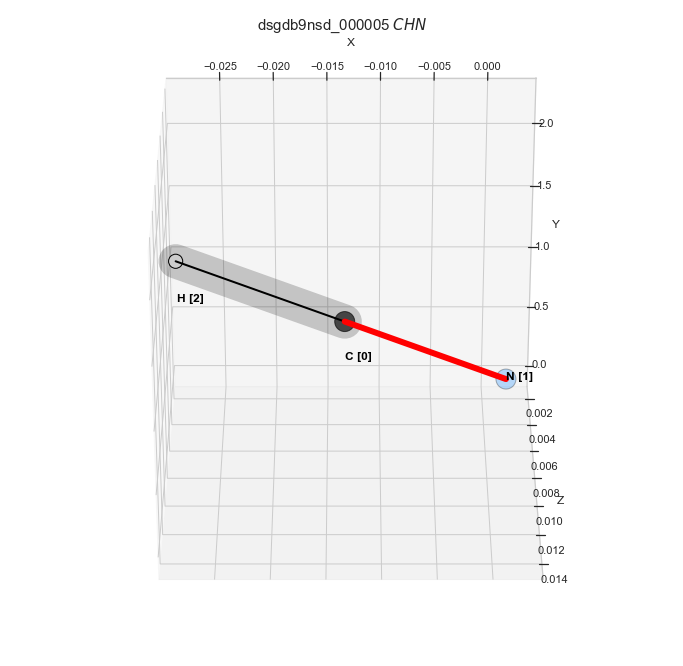

In [16]:
plot_molecule("dsgdb9nsd_000007", elev=120, azim=-90, bonds=train_bonds)

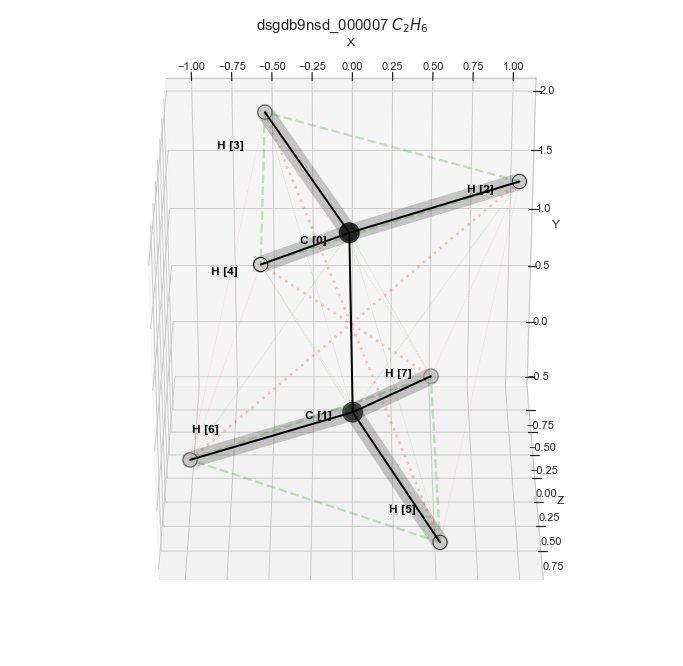

In [17]:
plot_molecule("dsgdb9nsd_000007", elev=120, azim=-90, bonds=train_bonds)

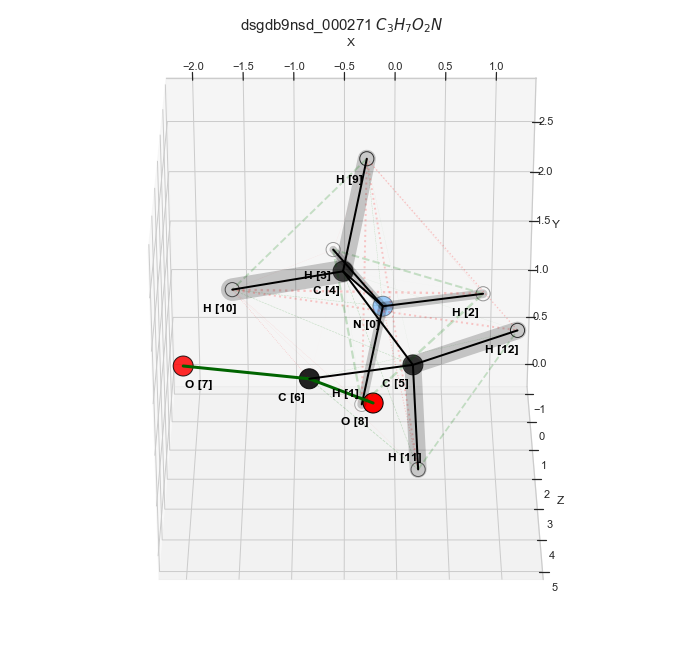

In [6]:
plot_molecule("dsgdb9nsd_000271", elev=120, azim=-90, bonds=train_bonds)

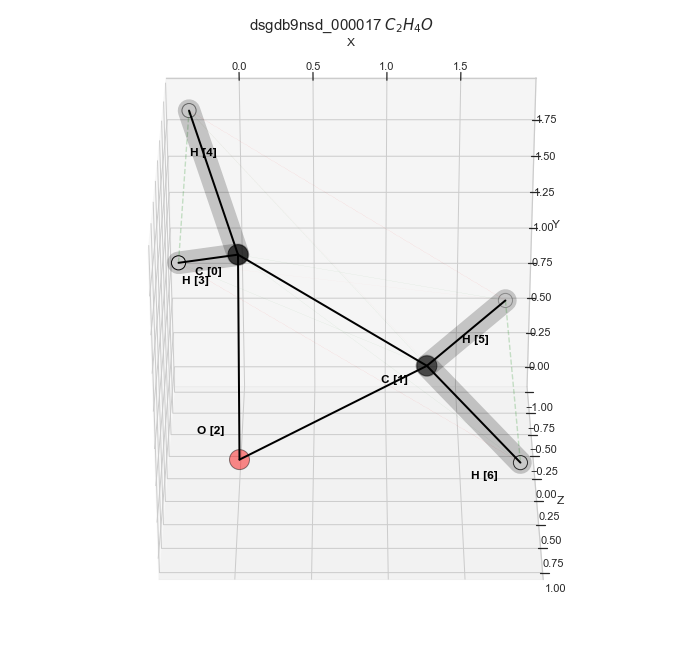

In [7]:
plot_molecule("dsgdb9nsd_000017", elev=120, azim=-90, bonds=train_bonds)

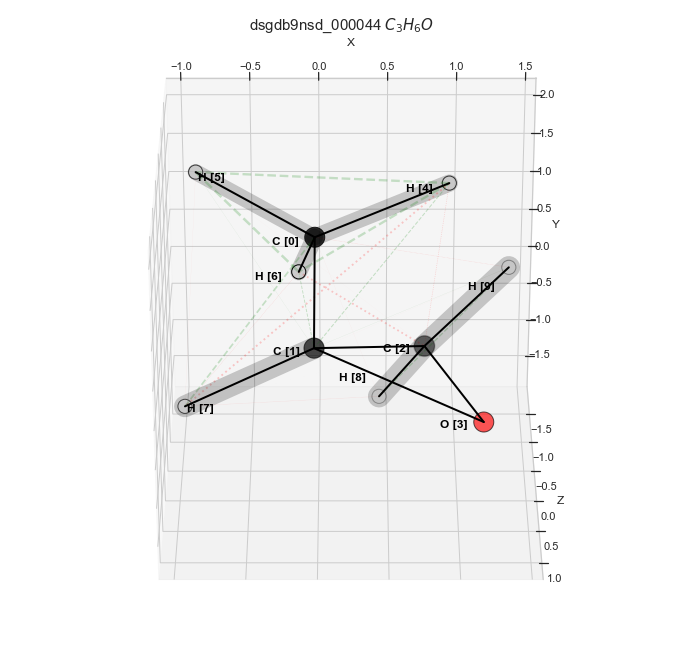

In [8]:
plot_molecule("dsgdb9nsd_000044", elev=120, azim=-90, bonds=train_bonds)

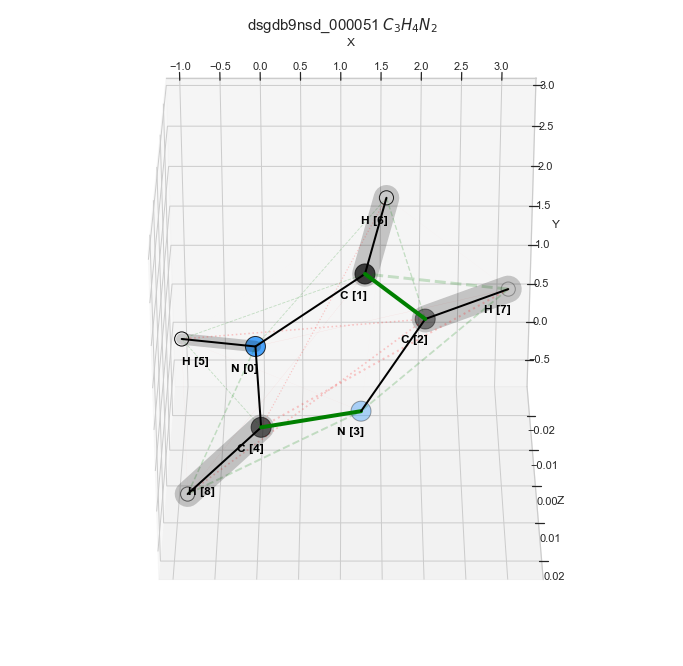

In [4]:
plot_molecule("dsgdb9nsd_000051", elev=120, azim=-90, bonds=train_bonds)